# Task-3: Decision Tree
In this task, we require a dataset, called 'Iris.csv'. It contains 4 features and 3 species, which is the label.
I have used "DecisionTreeClassifier()" from scikit-learn and trained the model. Later plotted the tree!!

# Importing the libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Reading the dataset

In [3]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop(['Id'],axis=1,inplace=True)

In [6]:
df.info()   # To obtain the information about all the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()  # Finding information like max, min, std. deviation, etc

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Pairplot
It plots pairwise relationship in a dataset.

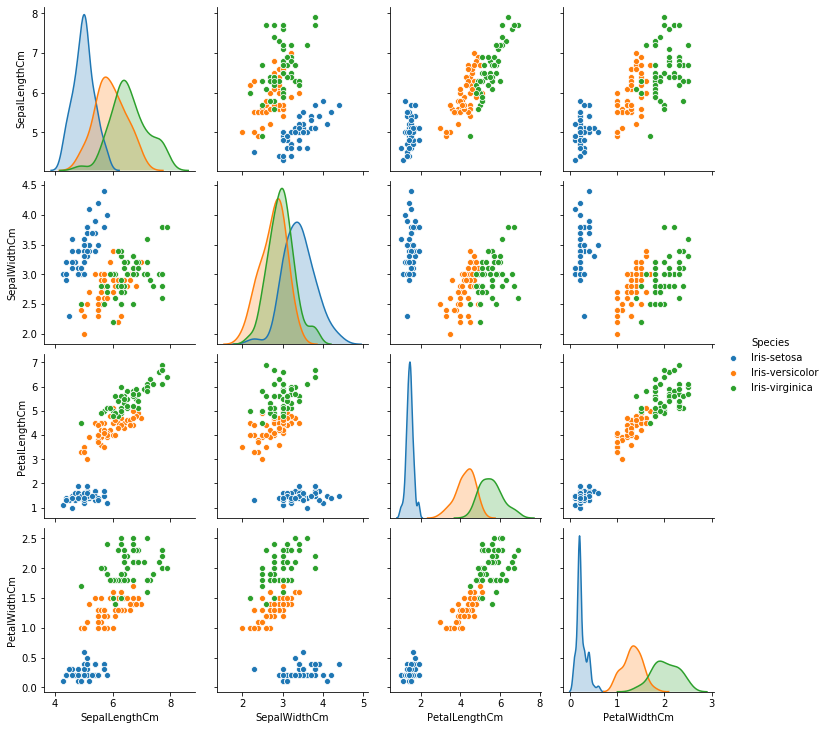

In [9]:
sns.pairplot(df, hue='Species')

# Subplot of all the columns
It plots subplots of different columns, based on our selection and division of region

Text(0.5, 1.0, 'Petal Width')

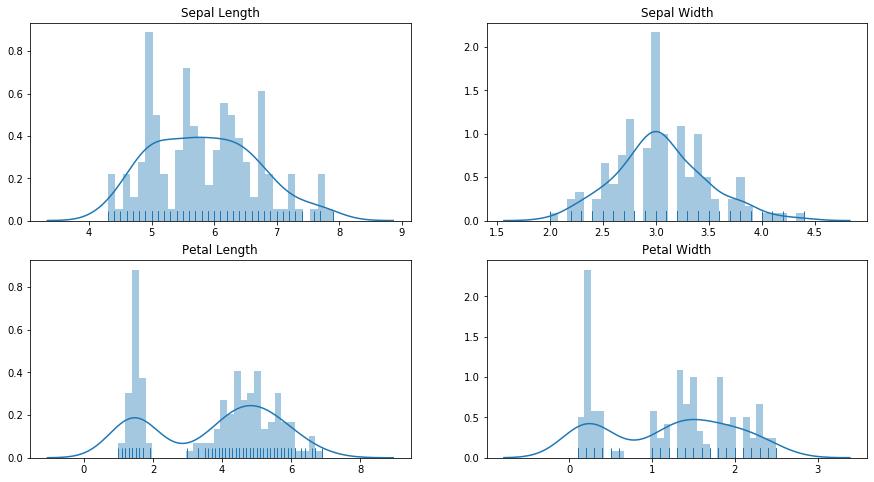

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.distplot(df['SepalLengthCm'].values,bins=30, kde=True, rug=True )
plt.title('Sepal Length')
plt.subplot(2,2,2)
sns.distplot(df['SepalWidthCm'].values,bins=30, kde=True, rug=True )
plt.title('Sepal Width')
plt.subplot(2,2,3)
sns.distplot(df['PetalLengthCm'].values,bins=30, kde=True, rug=True )
plt.title('Petal Length')
plt.subplot(2,2,4)
sns.distplot(df['PetalWidthCm'].values,bins=30, kde=True, rug=True )
plt.title('Petal Width')

# Separating dependent and independent variables

In [16]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [17]:
from sklearn.preprocessing import LabelEncoder
lbe= LabelEncoder()
y=lbe.fit_transform(y)

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

# Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(xtrain,ytrain)    # Fitting the model on training data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
ypred=dc.predict(xtest)  # Prediction on the testing data.
ypred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

# Accuracy, Confusion matrix and Classification Report of the model

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

Accuracy over testing data

In [23]:
accuracy_score(ytest,ypred)

1.0

Classification Report

In [24]:
print("Classification Report is:\n")
print(classification_report(ytest,ypred))

Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
print("Confusion Matrix is:\n")
print(confusion_matrix(ytest,ypred))

Confusion Matrix is:

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Plotting tree

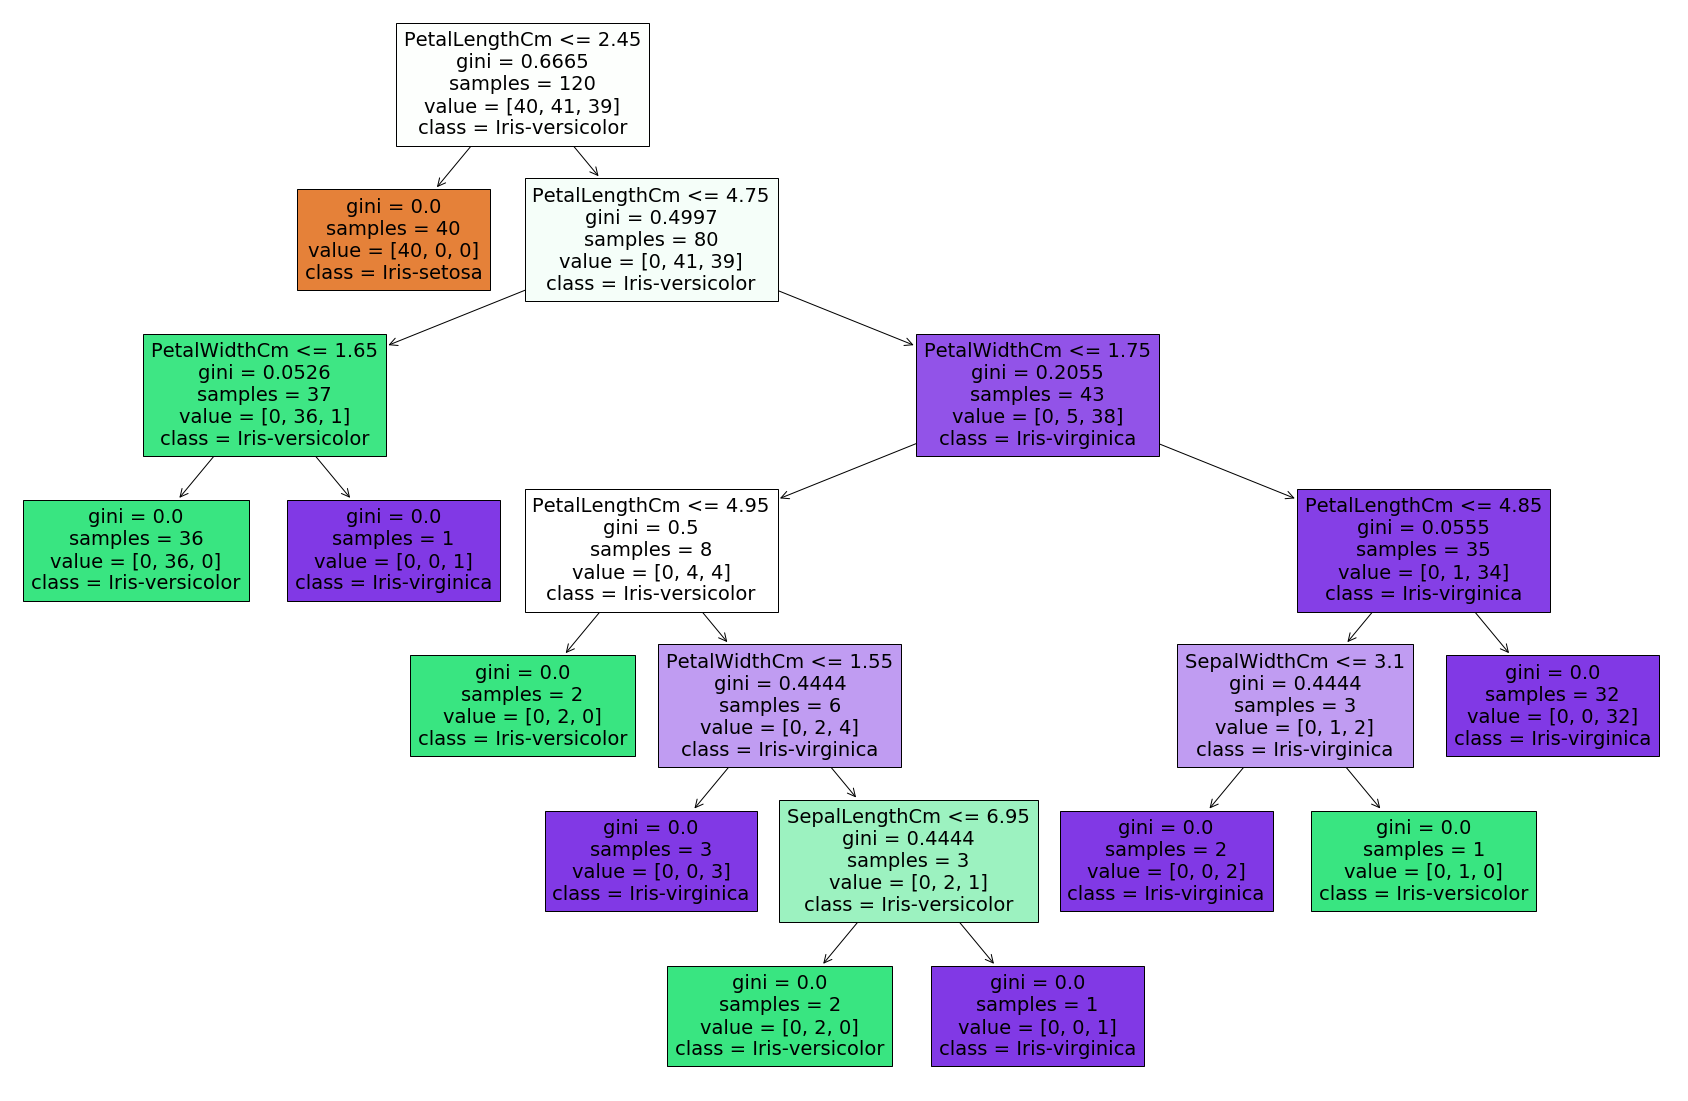

In [26]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,20))

tree_img= plot_tree(dc,feature_names=df.columns, class_names=df['Species'].unique().tolist(),
                   precision=4,label="all",filled=True)
plt.show()